1 integralj: 504.93342322276453 ;  errorj: 241.34662867342078
   integral for 1 iterations: 504.93342322276453 ;  error: 241.34662867342078 

2 integralj: 266.58244311550845 ;  errorj: 57.14098968148952
   integral for 2 iterations: 385.75793316913655 ;  error: 124.03799162823582 

3 integralj: 1230.0843953257865 ;  errorj: 530.4098081003751
   integral for 3 iterations: 667.2000872213532 ;  error: 195.32068107892246 

4 integralj: 313.82444905732103 ;  errorj: 105.47841173815561
   integral for 4 iterations: 578.8561776803451 ;  error: 148.86463381484515 

5 integralj: 391.00542455551977 ;  errorj: 99.05385870694137
   integral for 5 iterations: 541.28602705538 ;  error: 120.73288938186502 

6 integralj: 192.0569756325016 ;  errorj: 39.35416096387346
   integral for 6 iterations: 483.08118515156696 ;  error: 100.83831235036932 

7 integralj: 273.00799757265634 ;  errorj: 82.72211088491552
   integral for 7 iterations: 453.0707297831512 ;  error: 87.24138721743734 

8 integralj: 229.34

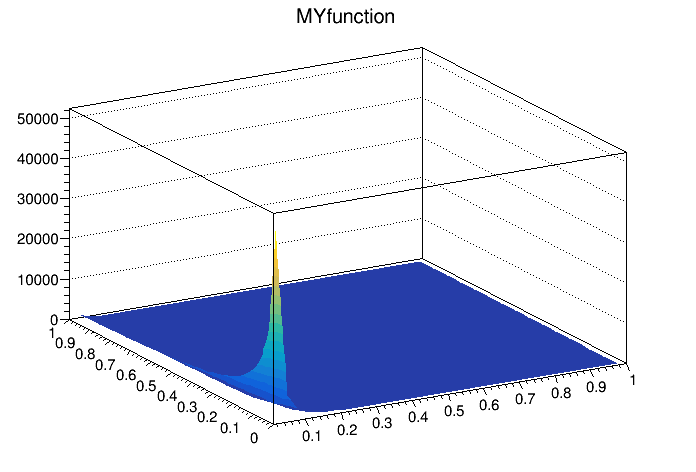

In [61]:
import sys
import ROOT,math
from ROOT import gRandom, TCanvas, TFormula, TF1, TH1F
from math import tan, sqrt, atan , sin
canvas = ROOT.TCanvas()

ax =0.01
bx =1
ay = 0
by = 1
def myfunc(var,p) :
    x = var[0]
    y = var[1]
    a = p[0]
    return a/(x*x*(y+ sin(x)*0.5))

ff = ROOT.TF2("MYfunction", f, ax, bx, ay, by, 1)

ff.SetParameter(0, 1)
ff.GetParameter(0)

ff.Draw("surf2")
canvas.Draw()

ff(ax,ay)



sumf = 0 #total sum of function values*(bx - ax)*(by - ay)
sumf2 = 0 #total sum of function values*(bx - ax)*(by - ay) squared

number = 1000

for j in range (1, 11):
    
    sumfj = 0 #function values*(bx - ax)*(by - ay) sum in j iteration
    sumfj2 = 0 #total sum of function values squared in j iteration
    
    for i in range (0, number):
        
        xi = ROOT.gRandom.Uniform(ax, bx)
        yi = ROOT.gRandom.Uniform(ay, by)
        fi = ff(xi, yi)
        
        sumfj = sumfj + fi*(bx - ax)*(by - ay)
        sumfj2 = sumfj2 + (fi*(bx - ax)*(by - ay))**2
        
    sumf = sumf + sumfj
    sumf2 = sumf2 + sumfj2
    
    integralj = sumfj/number #integral value in j iteration
    integral = sumf/(j*number) #total integral value after j iterations
    
    
    Dj = sumfj2/number - (integralj)**2
    errorj = math.sqrt(Dj/number) #error in j iteration
    
    D = sumf2/(j*number) - (integral)**2
    error = math.sqrt(D/(j*number)) #total error after j iterations
    
    
    print(j, "integralj:", integralj, ";  errorj:", errorj)
    print("   integral for", j, "iterations:", integral, ";  error:", error, "\n")
    

In [62]:
print("Total integral value: ", integral)
print("Total error: ", error)

Total integral value:  413.72832336765936
Total error:  62.81152392731517


In [16]:
# constant used in "analytical" part 
c = 0.01


# formula for integrated "analytical" part
def f1_integral(ax, bx, ay, by):
    result = -1*(1/bx - 1/ax)*math.log((by + c)/(ay + c))
    return result

f1_integral(ax, bx, ay, by)


456.8969311672847

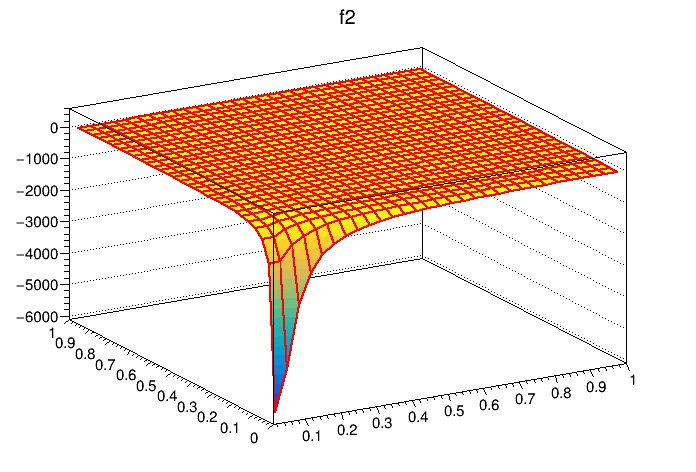

In [49]:
 # formula for second part f2
c = 0.01
from ROOT import gRandom, TCanvas
def func2(var, p):
    x = var[0]
    y = var[1]
    a = p[0]
    return a*(c - (1/2)*math.sin(x))/((x**2)*(y +(1/2)*math.sin(x))*(y + c))

f2 = ROOT.TF2("f2", func2, ax, bx, ay, by, 1)
f2.SetParameter(0, 1)

f2.Draw("surf1")
canvas.Draw()


In [52]:
f2_sumf = 0 #total sum of f2 values*(bx - ax)*(by - ay)
f2_sumf2 = 0 #total sum of f2 values*(bx - ax)*(by - ay) squared

number = 1000

for j in range (1, 11):
    
    f2_sumfj = 0 #f2 values*(bx - ax)*(by - ay) sum in j iteration
    f2_sumfj2 = 0 #total sum of f2 values squared in j iteration
    
    for i in range (0, number):
        
        xi = ROOT.gRandom.Uniform(ax, bx)
        yi = ROOT.gRandom.Uniform(ay, by)
        fi = f2(xi, yi)
        
        f2_sumfj = f2_sumfj + fi*(bx - ax)*(by - ay)
        f2_sumfj2 = f2_sumfj2 + (fi*(bx - ax)*(by - ay))**2
    
    f2_sumf = f2_sumf + f2_sumfj
    f2_sumf2 = f2_sumf2 + f2_sumfj2
    
    integralj = f1_integral(ax, bx, ay, by) + f2_sumfj/number #integral value in j iteration
    integral = f1_integral(ax, bx, ay, by) + f2_sumf/(j*number) #total integral value after j iterations
    Dj = f2_sumfj2/number - (f2_sumfj/number)**2
    errorj = math.sqrt(Dj/number) #error in j iteration
    
    D = f2_sumf2/(j*number) - (f2_sumf/(j*number))**2
    error = math.sqrt(D/(j*number)) #total error after j iterations
    
    
    print(j, "integral:", integralj, ";  error:", errorj)
    print("   integral for", j, "iterations:", integral, ";  error:", error, "\n")

1 integral: 388.37332333435234 ;  error: 35.34757039088516
   integral for 1 iterations: 388.37332333435234 ;  error: 35.34757039088516 

2 integral: 417.06580603854076 ;  error: 14.315124543779907
   integral for 2 iterations: 402.7195646864465 ;  error: 19.070822953692744 

3 integral: 391.02199684770386 ;  error: 20.0477134182876
   integral for 3 iterations: 398.82037540686565 ;  error: 14.363484519543118 

4 integral: 424.90130409856823 ;  error: 6.1599725695927585
   integral for 4 iterations: 405.3406075797913 ;  error: 10.883596059774987 

5 integral: 447.7114982237449 ;  error: 15.556777922374021
   integral for 5 iterations: 413.814785708582 ;  error: 9.249199282754864 

6 integral: 395.5328454539253 ;  error: 21.917062652694984
   integral for 6 iterations: 410.76779566613925 ;  error: 8.52989570092961 

7 integral: 428.6724107187737 ;  error: 12.403978632915202
   integral for 7 iterations: 413.3255978165156 ;  error: 7.523380982219749 

8 integral: 448.7665732812702 ;  err

In [53]:
print("Total integral value: ", integral)
print("Total error: ", error)

Total integral value:  418.74447288231426
Total error:  6.8450958548340886
